In [1]:
import cv2 as cv
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt

In [2]:
cat_img = cv.imread("6f4247f9f566ae1dbf5caea8ba9e48e2.jpg")
cat_img = cv.cvtColor(cat_img, cv.COLOR_RGB2GRAY)

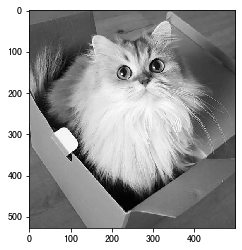

In [4]:
plt.imshow(cat_img, cmap=plt.cm.gray, interpolation='nearest')

In [6]:
p,s,q = svd(cat_img, full_matrices=False)

In [9]:
def get_image_feature(img, s, k):
    # 对于S，只保留前K个特征值
    s_temp = np.zeros(s.shape[0])
    s_temp[0:k] = s[0:k]
    s = s_temp * np.identity(s.shape[0])
    # 用新的s_temp，以及p,q重构A
    temp = np.dot(p,s)
    temp = np.dot(temp,q)
    plt.imshow(temp, cmap=plt.cm.gray, interpolation='nearest')
    plt.show()
    print(img-temp)

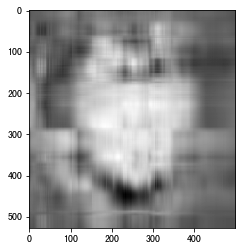

[[33.91710342 34.62122218 35.67058185 ... 18.90488032 19.11997408
  19.26344105]
 [35.56864569 36.33202259 37.44393509 ... 19.03544357 19.26081018
  19.41127769]
 [36.32316072 37.17367858 38.36956258 ... 18.99882461 19.23925274
  19.39998651]
 ...
 [16.24880618 14.57370519 15.20358891 ... 15.32711068 15.36052
  15.39324111]
 [17.34911613 15.69213037 16.32055336 ... 16.35484488 16.38918434
  16.42248174]
 [17.52209915 15.8884047  15.51797437 ... 16.44428641 16.48104918
  16.51578869]]


In [10]:
get_image_feature(s, 5)